In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# load the data
data = pd.read_csv("train.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1583,1,2.1,1,11,0,14,0.7,148,7,...,942,1651,1704,17,13,2,1,0,1,1
1,745,1,0.6,1,5,0,35,0.8,102,8,...,89,1538,2459,14,1,16,1,1,0,0
2,832,0,0.7,1,2,1,39,0.7,103,4,...,125,1504,1799,5,2,11,1,0,1,0
3,1175,1,1.3,0,2,0,19,0.3,164,7,...,873,1394,1944,9,4,9,1,1,0,0
4,695,0,0.5,0,18,1,12,0.6,196,2,...,1649,1829,2855,16,13,7,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1872,1,0.5,1,14,0,49,0.2,139,7,...,81,1389,3153,16,15,5,1,1,0,1
1196,1239,0,1.2,1,5,1,52,0.9,122,2,...,590,661,417,8,0,6,1,0,1,0
1197,1195,1,1.1,1,2,1,8,0.9,80,6,...,327,1001,643,14,2,19,1,0,0,0
1198,671,0,0.9,1,10,0,30,0.7,105,7,...,852,1182,2504,6,4,15,1,0,0,1


In [3]:
# split the data into X and y
X = data.drop('price_range', axis=1)
y = data['price_range']

test = pd.read_csv("test.csv")
test_data = test.drop('price_range', axis=1)
test_ans = pd.DataFrame(test['price_range'])

## KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# use GridSearchCV to find the best k of KNN
param = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param, cv=5)
knn_cv.fit(X, y)

knn_cv.best_params_

{'n_neighbors': 19}

In [6]:
# use the best k to train the model

knn_clf = KNeighborsClassifier(n_neighbors=knn_cv.best_estimator_.n_neighbors)
knn_clf.fit(X, y)



KNeighborsClassifier(n_neighbors=19)

### KNN Test


In [7]:
# predict the test data

knn_pred = knn_clf.predict(test_data)
print("Accuracy:",metrics.accuracy_score(test_ans, knn_pred))


Accuracy: 0.9733333333333334


Text(33.22222222222222, 0.5, 'Truth')

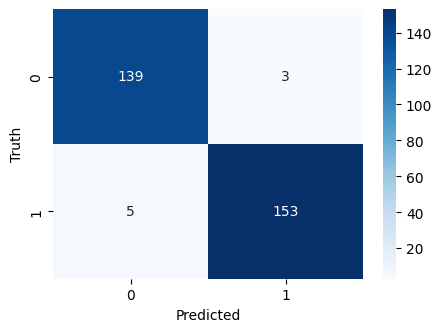

In [8]:
# plot the confusion matrix

confusion_matrix(test_ans, knn_pred)

plt.figure(figsize=(5, 3.5))
sns.heatmap(confusion_matrix(test_ans, knn_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')




## Decision Tree

### Decision Tree Train

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# use GridSearchCV to find the best parameters of Decision Tree

param = {'criterion':['gini', 'entropy'], 'max_depth':range(1, 5, 1), 'min_samples_leaf':range(1, 26, 5)}
clf = GridSearchCV(DecisionTreeClassifier(), param, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 16}

In [10]:


dt_clf = DecisionTreeClassifier(criterion=clf.best_params_['criterion'], max_depth=clf.best_params_['max_depth'], min_samples_leaf=clf.best_params_['min_samples_leaf'])
dt_clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=16)

### Decision Tree Test

In [11]:
dt_pred = dt_clf.predict(test_data)
print("Accuracy:", accuracy_score(test_ans, dt_pred))
 

Accuracy: 0.94


Text(33.22222222222222, 0.5, 'Truth')

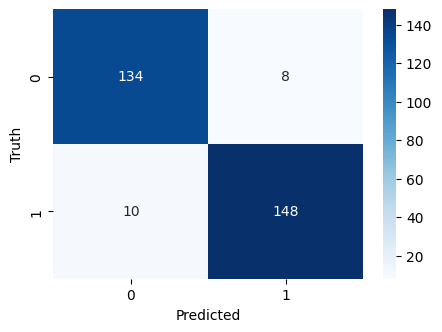

In [12]:
confusion_matrix(test_ans, dt_pred)
plt.figure(figsize=(5, 3.5))
sns.heatmap(confusion_matrix(test_ans, dt_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Random Forest

### Random Forest Train

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param = {'n_estimators':range(1, 100, 10), 'criterion':['gini', 'entropy'], 'max_depth':range(1, 5, 1), 'min_samples_leaf':range(1, 26, 5)}
clf = GridSearchCV(RandomForestClassifier(), param, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'n_estimators': 11}

In [14]:
rf_clf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], criterion=clf.best_params_['criterion'], max_depth=clf.best_params_['max_depth'], min_samples_leaf=clf.best_params_['min_samples_leaf'])
rf_clf.fit(X, y)

rf_pred = rf_clf.predict(test_data)
print("Accuracy:", accuracy_score(test_ans, rf_pred))


Accuracy: 0.9033333333333333


Text(33.22222222222222, 0.5, 'Truth')

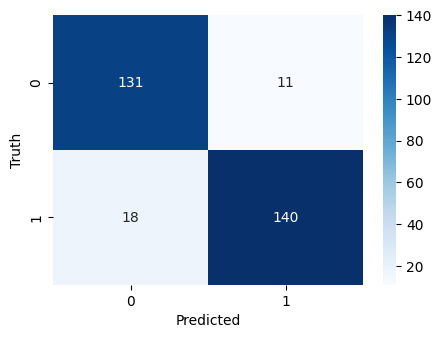

In [15]:
confusion_matrix(test_ans, rf_pred)
plt.figure(figsize=(5, 3.5))
sns.heatmap(confusion_matrix(test_ans, rf_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')


## SVM

### SVM Train

In [16]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV


param = {'C':[0.001, 0.01, 0.1, 1, 10], 'gamma':[100, 10, 1, 0.1, 0.01], 'kernel':['rbf', 'linear']}
clf = GridSearchCV(SVC(), param, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)
clf.fit(X, y)

clf.best_params_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'C': 0.001, 'gamma': 100, 'kernel': 'linear'}

In [17]:
SVM_clf = SVC(C=clf.best_params_['C'], gamma=clf.best_params_['gamma'], kernel=clf.best_params_['kernel'])
SVM_clf.fit(X, y)


SVC(C=0.001, gamma=100, kernel='linear')

### SVM Test

In [18]:
svm_pred = SVM_clf.predict(test_data)
print("Accuracy:", accuracy_score(test_ans, svm_pred))


Accuracy: 0.9866666666666667


Text(33.22222222222222, 0.5, 'Truth')

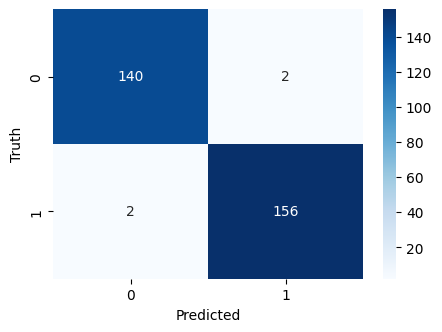

In [19]:
confusion_matrix(test_ans, svm_pred)
plt.figure(figsize=(5, 3.5))
sns.heatmap(confusion_matrix(test_ans, svm_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')